Basic information about the climate data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     2668 non-null   int64  
 1   DATE                                        2668 non-null   object 
 2   REPORT_TYPE                                 2668 non-null   object 
 3   SOURCE                                      2668 non-null   int64  
 4   BackupElements                              2668 non-null   object 
 5   BackupElevation                             2668 non-null   int64  
 6   BackupEquipment                             2668 non-null   object 
 7   BackupLatitude                              2668 non-null   float64
 8   BackupLongitude                             2668 non-null   float64
 9   BackupName                                 

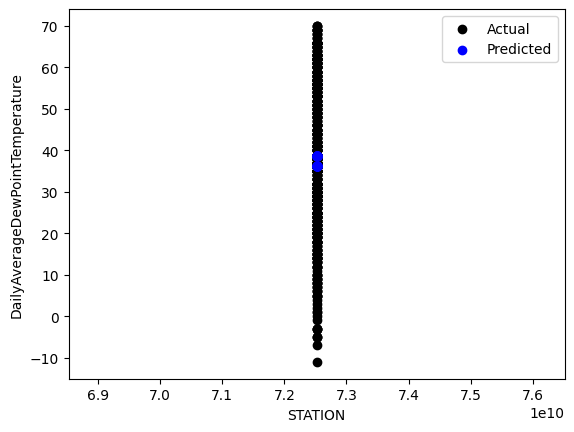

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def read_climate_data(file_path):

    df = pd.read_csv(file_path)
    return df

def linear_regression_analysis(data_frame):
    # Selecting features and target variable
    X = data_frame[['STATION', 'SOURCE', 'BackupLatitude','BackupLongitude']]
    y = data_frame['DailyAverageDewPointTemperature']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a linear regression model
    model = LinearRegression()

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Visualizing the results
    plt.scatter(X_test['STATION'], y_test, color='black', label='Actual')
    plt.scatter(X_test['STATION'], y_pred, color='blue', label='Predicted')
    plt.xlabel('STATION')
    plt.ylabel('DailyAverageDewPointTemperature')
    plt.legend()
    plt.show()

def main():

    file_path = 'daily_data.csv'

    # Read the climate data
    climate_data = read_climate_data(file_path)

    # Display basic information about the data
    print("Basic information about the climate data:")
    print(climate_data.info())

    # Perform linear regression analysis
    linear_regression_analysis(climate_data)

if __name__ == "__main__":
    main()